# Fashion MNIST CNN with Keras

In [1]:
# Libraries
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras

### Dataset
<ul>
    <li><span style='color: rgb(0, 0, 0); font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-size: 14px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: left; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>Import data and splitit in train_data (60k images with their labels) and test_data (10k images with their labels).</span>&nbsp;</li>
</ul>

In [2]:
# Import data
from keras import datasets 
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.fashion_mnist.load_data()

print(f"Train_data_shape: {train_data.shape}") # 60k images, 28px, 28px
print(f"Test_data_shape: {test_data.shape}") # 10k images, 28px, 28px
train_data[0].shape

Train_data_shape: (60000, 28, 28)
Test_data_shape: (10000, 28, 28)


(28, 28)

### Normalizing 
<ul>
    <li>Normalizing numbers ranging 0-255 to .0-.9</li>
    <li>This will plot the images a little bit darker, becouse we are in a smaller colour range (.0-.9).</li>
    <li>But this will train and predict easier and faster.</li>
</ul>

In [3]:
train_data = tf.keras.utils.normalize(train_data, axis=1)
test_data = tf.keras.utils.normalize(test_data, axis=1)

# Expand the shape from (28, 28) to (28, 28, 1)
train_data = np.expand_dims(train_data, axis=3)
test_data = np.expand_dims(test_data, axis=3)
train_data[0].shape

(28, 28, 1)

In [13]:
# Data label vals
fash = {0:"T-shirt",
       1:"Trouser",
       2:"Pullover",
       3:"Dress",
       4:"Coat",
       5:"Shandal",
       6:"Shirt",
       7:"Sneaker",
       8:"Bag",
       9:"Boot"}

### Random plotting 

In [5]:
# Random plotting
import random as rd
def random_plotting():
    for i in range(8):
        r = rd.randint(0, len(train_data))
        plt.subplot(2, 4, i+1)
        plt.text(0, 32, fash[train_label[r]])
        plt.axis("off")
        plt.imshow(train_data[r], cmap="gray")

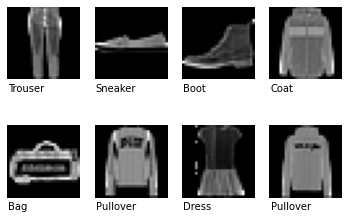

In [18]:
random_plotting()

<h3> Model </h3>
<p>This <strong>CNN</strong> take as input: image_height, image_width and channels (28,28,1).</p>
<li>The first layer is a <strong>Conv2D</strong>. Who extract features by sliding the convolutional filter on the input image. In this model i choose a 3x3 feature map.</li>
</ul>
<p style="text-align: center;">Example of a feature map:</p>
<p style="text-align: center;"><img src="https://myfiles.space/user_files/80578_ac4d62888e543977/80578_custom_files/img1615403675.png" style="width: 564px;"></p>
<ul>
    <li>&nbsp;The second layer is a <strong>MaxPooling</strong>. This layer reduce the dimensionality of each feature. Helping with shortest training time.</li>
</ul>
<table style="width: 100%;">
</table>
<p style="text-align: center;">Example of how MaxPooling works:</p>
<p style="text-align: center;"><img src="https://myfiles.space/user_files/80578_ac4d62888e543977/80578_custom_files/img1615404086.gif" style="width: 564px;"></p>
<p><img src="https://myfiles.space/user_files/80578_ac4d62888e543977/80578_custom_files/img1615404102.png" style="width: 564px;"></p>
<ul>
    <li>The next layer is a <strong>Dropout</strong> who help to reduce overfitting.</li>
    <li>The fourth layer is a <strong>Flatten</strong>.This layer help to connect the last layer output into a dense layer.&nbsp;</li>
    <li>The fifth layer is a <strong>Dense</strong> layer.This layer process all of our features and predict wich clothe is it. Also this layer have a &quot;relu&quot; activation.</li>
    <p>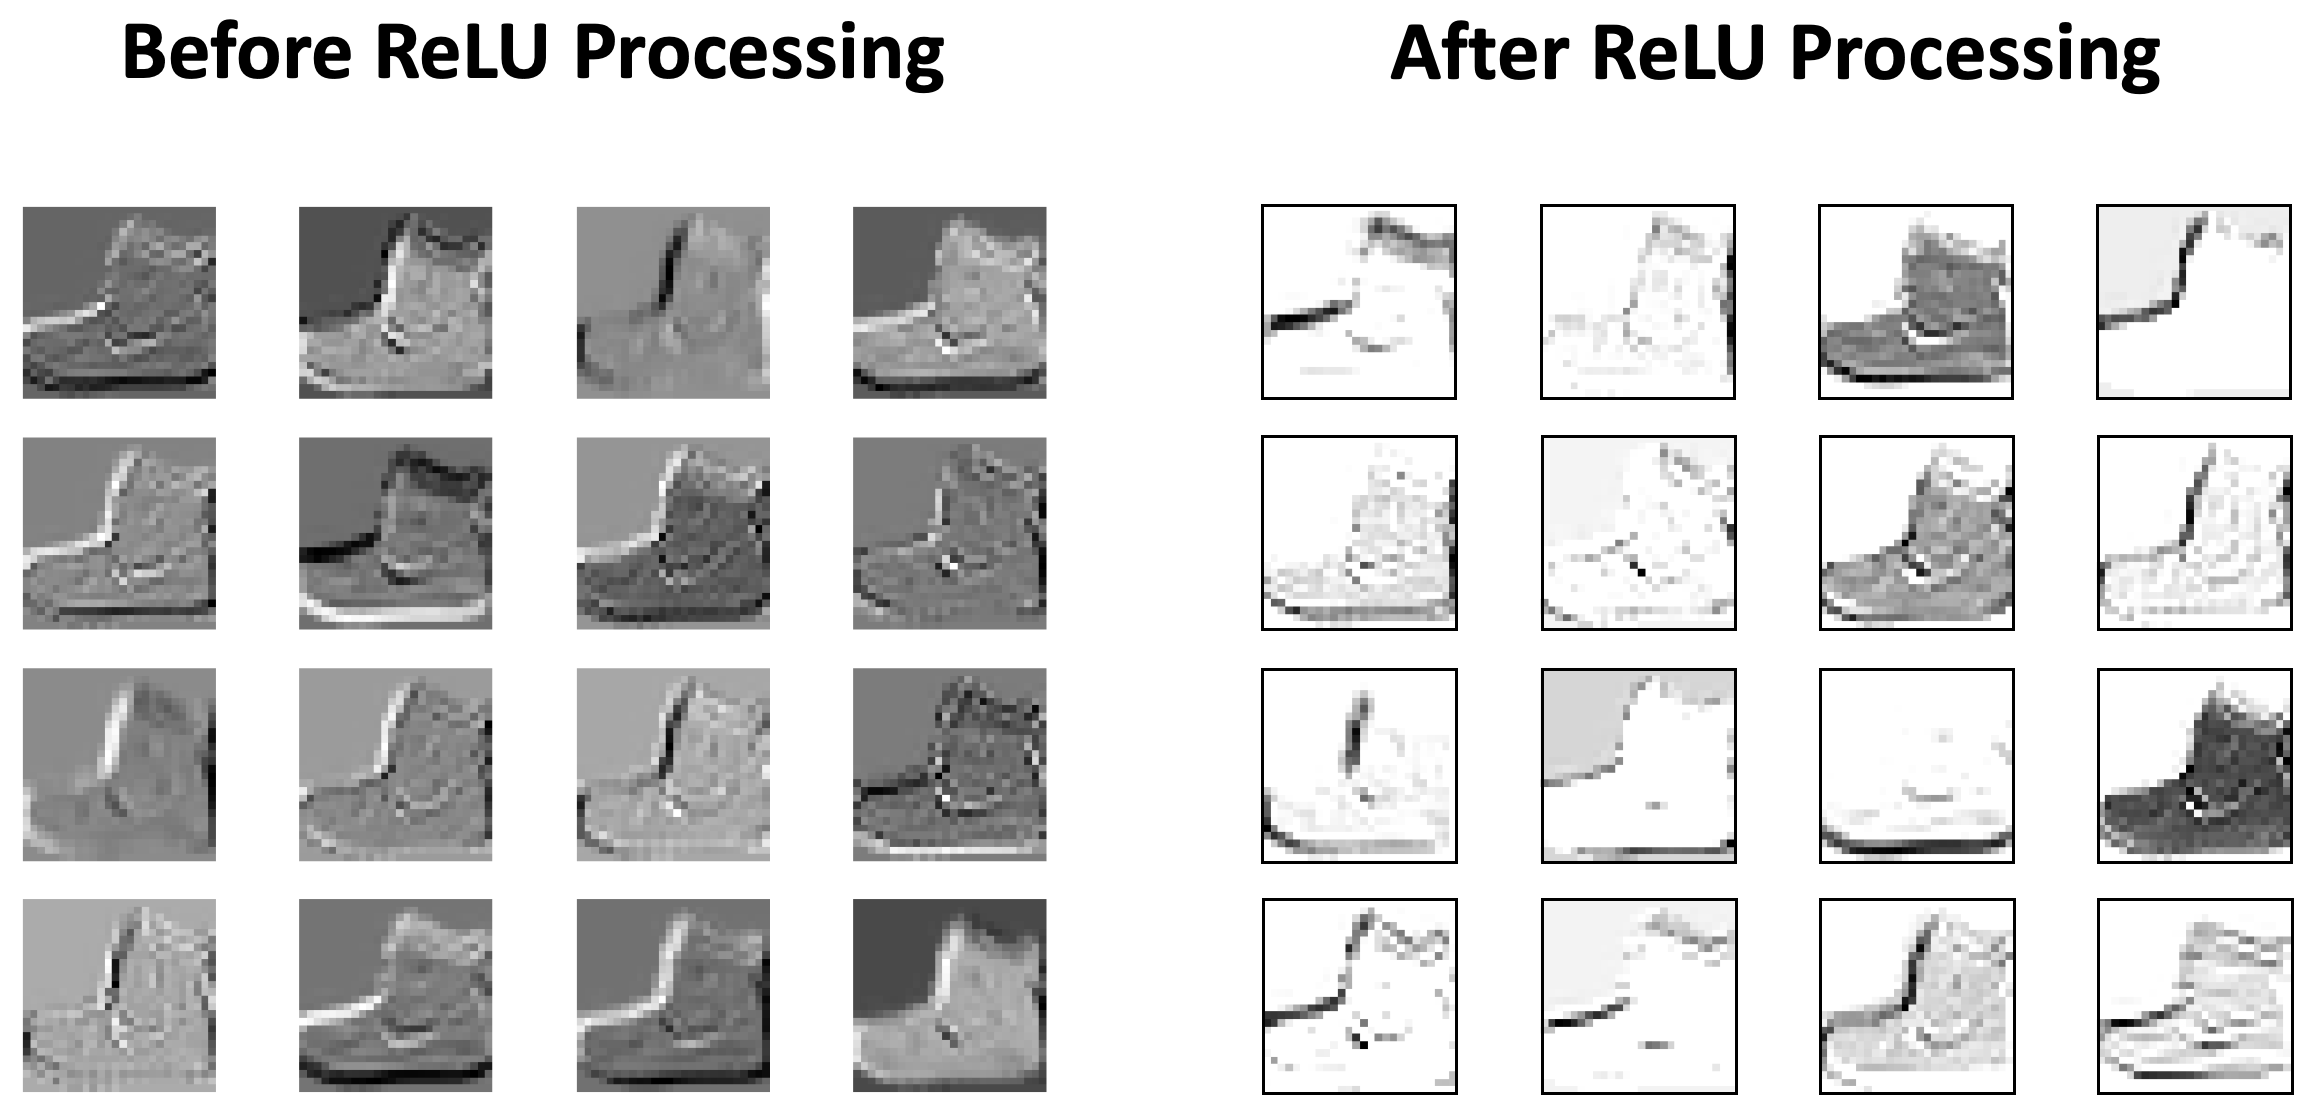</p>
    <li>Another <strong>Dropout</strong> layer to reduce overfitting.</li>
    <li>Last layer is an <strong>Dense</strong> layer. This layer with softmax activation its gonna output the probabilities of each clothe.</li>
</ul>
<p>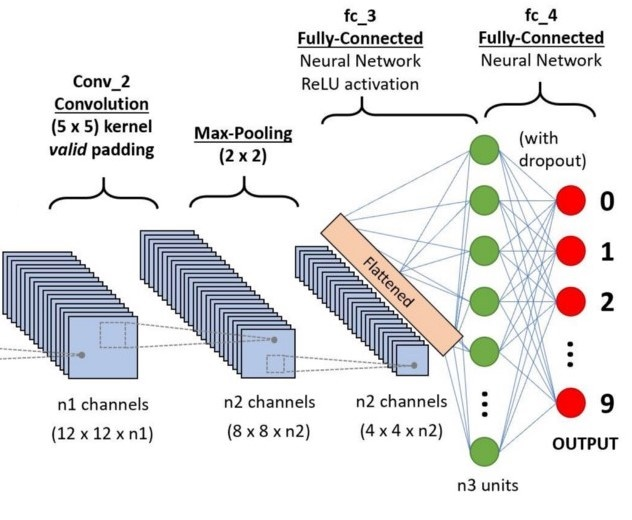</p>

In [7]:
def model():
    cnn = keras.Sequential([
            keras.Input(shape=(28,28,1)),

            keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Dropout(.25),

            keras.layers.Flatten(),

            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(.3),
            keras.layers.Dense(10, activation="softmax"),
        ])
    return cnn

### Compile
<p>To <strong>compile&nbsp;</strong>the model i use:</p>
<ul>
    <li><span style='color: rgb(0, 0, 0); font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-size: 14px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: left; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>The <strong>cross-entropy</strong> loss. Calculate the error rate between the predicted value and the original value.</span></li>
    <li><span style='color: rgb(0, 0, 0); font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-size: 14px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: left; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><strong>Adam </strong>optimizer. <strong>Stochastic Gradient Descent.</strong></span></li>
</ul>

In [8]:
cnn = model()
cnn.compile(optimizer="adam", 
           loss="sparse_categorical_crossentropy", 
           metrics=["accuracy"])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Training Model
To train the model we need: train_data, train_label and nº of epochs

In [9]:
cnn.fit(train_data, train_label, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6337 - accuracy: 0.7748
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3292 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2947 - accuracy: 0.8904
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2646 - accuracy: 0.9002
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2490 - accuracy: 0.9074


### Calculate loss and acc

In [10]:
val_loss, val_acc = cnn.evaluate(test_data, test_label, verbose=0)
print(f"Loss: {val_loss}, Acc: {val_acc}")

Loss: 0.276189386844635, Acc: 0.9009000062942505


### Visualizing if it works and what my model learns

In [14]:
def predictions():
    for i in range(8):
        r = rd.randint(0, len(test_data))
        plt.subplot(2,4,i+1)
        plt.axis("off")
        prediction = cnn.predict([test_data])
        max_val = np.argmax(prediction[r])
        plt.text(0,32, f"predict: {fash[max_val]}")
        plt.text(0,36, f"correct: {fash[test_label[r]]}")
        plt.imshow(test_data[r], cmap="gray")

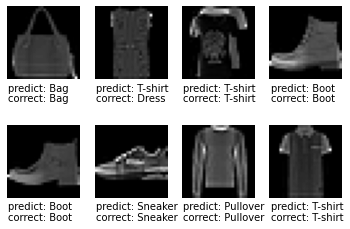

In [15]:
predictions()